In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py
from plotly.graph_objs import *
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy as sp
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.mixture import GMM
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy import exp
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.libqsturng import psturng
from scipy.stats import mannwhitneyu
from scipy.stats import mstats

pd.set_option('display.max_columns', 500)
np.set_printoptions(linewidth=5000)
np.set_printoptions(threshold=10000)
np.set_printoptions(precision=3)
%matplotlib inline

In [2]:
class Helpers(object):
    
    @staticmethod
    def changeAge(age):
        return age+1919
    
    @staticmethod
    def basicBarPlot(title, values, x_tick_labels, x_label, y_label, x_label_rotation, y_tick_labels =None, label=None, x_grid=False, y_grid=False, color_bar='m', xlim=None, ylim=None, file_name=None, bar_width=None):
        """
        title: Plot title
        values: Values to plot (frequencies)
        label: Legend
        x_labels: Name of each bar
        y_label: Label of y axis
        x_label_rotation: angle of rotation of the x_labels
        color_bar: color
        xlim: x axis limit
        ylim: y axis limit
        file_name: filename to store the plot
        """
        if(len(values) != len(x_tick_labels)):
            print ("Lenght of data does not match length of labels given!!")
        else:
            plt.figure(figsize=(5,5))
            fig, ax = plt.subplots()
            fig.canvas.set_window_title(title)
            pos = np.arange(len(x_tick_labels)) + 0.5
            ax.yaxis.grid(y_grid, linestyle='--', which='major',
                               color='grey', alpha=.25)
            ax.xaxis.grid(x_grid, linestyle='--', which='major',
                               color='grey', alpha=.25)
            pos = np.arange(len(x_tick_labels)) + 0.5
            if(bar_width!=None):
                ax.bar(pos, values, align='center', color=color_bar, label=label, width=bar_width)
            else:
                ax.bar(pos, values, align='center', color=color_bar, label=label)
            x_tick_pos = np.arange(0.5,len(values) + 0.5,1)
            x_tick_pos
            # Modify position of xticklabels
            ax.set_xticks(x_tick_pos)
            ax.set_xticklabels( x_tick_labels, rotation = x_label_rotation)
            ax.set_ylabel(y_label)
            ax.set_xlabel(x_label)
            
            if(y_tick_labels != None):
                y_tick_pos = np.arange(1,len(y_tick_labels) ,1)
                ax.set_yticks(y_tick_pos)
                ax.set_yticklabels(y_tick_labels)

            # xlim and ylim are lists
            if(xlim!=None):
                ax.set_xlim(xlim)
            if(ylim!=None):
                ax.set_ylim(ylim)

            plt.legend( loc='best', numpoints = 1 )

            # save file if name given as eps
            if(file_name != None):
                plt.savefig(file_name, format='pdf', dpi=1000,bbox_inches='tight')

            plt.show()
            
    @staticmethod
    def countPerColumn(df,fr,to,axis=0):
        """
        Count the number of non NaN entried per column. 
        """
        return df.count(axis=axis)[fr:to]
    
    @staticmethod
    def getCountEachOption(df,start,end,column_name):
        """
        For a column, give the frequency of each option
        """
        arr_count = []
        for i in range(start, end+1, 1):
            arr_count.append(df[column_name][df[column_name]==i].count())
        return arr_count
    
    
    @staticmethod
    def convertColumn(col_name,df):
        """
        Find all columns containing that column name
        Iterate and assign numbers corresponding to the column
        return dataframe with extra column
        col_name: new column name
        df: dataframe
        """
        # names of all columns containing col_name
        cols = [c for c in df.columns if col_name in c]
        # add empty column to dataframe
        df[col_name] = np.NAN
        print cols
        print col_name
        # look into each column and find if
        for c in cols:
            if(c == col_name):
                continue
            print c
            name_num = c.split("_")
            print name_num
            num = name_num[1] # the number after the "_"
            print name_num[0]
            print name_num[1]
            df[col_name] = df.apply(lambda x: num if (x[c] == 1) else x[col_name], axis=1)
        
        return df
    
    
              
    @staticmethod
    def basicPlot(title, values,labels,x_label, y_label, x_grid=None, y_grid=None, xlim=None, ylim=None, file_name=None):
        """
        title: plot title
        values: same number of columns stacked one on another vectors (append list)
        x_label: x axis label
        y_label: y axis label
        file_name: filename to save
        """
        color = ['b','g','r','m','y','c','k','w','#FF8C00','#FF7F50','#8A2BE2','#D2691E']
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        fig.canvas.set_window_title(title)

        if(y_grid!=None):
            ax.yaxis.grid(y_grid, linestyle='--', which='major',
                                   color='grey', alpha=.25)
        if(x_grid!=None):
            ax.xaxis.grid(x_grid, linestyle='--', which='major',
                                   color='grey', alpha=.25)

        for i in range(0,len(values)):
            print (values[i])
            print (range(0,len(values[i]) + 1))
            ax.plot(range(1,len(values[i]) + 1), values[i],linestyle='--', marker='o', color=color[i], label = labels[i])
            
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)

        # xlim and ylim are lists
        if(xlim!=None):
            ax.set_xlim(xlim)
        if(ylim!=None):
            ax.set_ylim(ylim)

        plt.legend( loc='best', numpoints = 1, prop={'size':6})

        # save file if name given as eps
        if(file_name != None):
            plt.savefig(file_name, format='pdf', dpi=1000, bbox_inches='tight')

        plt.show()
        
    @staticmethod
    def showColumnsWith(name, df):
        """
        name: name of column in quotes
        df: dataframe
        """
        cols = [c for c in df.columns if name in c]
        print df[cols]
            

In [19]:
df = pd.read_csv('data_thesis.csv', skiprows=[2], encoding='utf-8-sig')
df = df.drop(df.columns[[4,5]], axis=1)
df.columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12','Q10','Q11_1','Q11_2','Q11_3','Q11_4','Q12','Q13_1','Q13_2','Q13_3','Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q14','Q15']

In [20]:
df.iloc[0]

Q1                               Q1 - What is your gender?
Q2                          Q2 - Which year were you born?
Q3                                  Q3 - List of Countries
Q4       Q4 - What is the highest level of education yo...
Q5       Q5 - Which of the following categories best de...
Q6       Q6 - Which\ntypes of apps do you usually have ...
Q7       Q7 - How many times do you check your mobile p...
Q8       Q8 - How\nconcerned are you about the privacy ...
Q9_1     Q9_1 - Accelerometer (It measures the changes ...
Q9_2     Q9_2 - Gyroscope (It measures the rotation/ tw...
Q9_3     Q9_3 - GPS (It measures the geographical locat...
Q9_4     Q9_4 - Proximity Sensor (It measures the physi...
Q9_5     Q9_5 - Ambient Light Sensor (It measures the a...
Q9_6     Q9_6 - Battery sensor (It measures the battery...
Q9_7     Q9_7 - Microphone (It measures several sound f...
Q9_8                                         Q9_8 - Camera
Q9_9     Q9_9 - Thermometer (It measures the temperatur.

In [21]:
# remove the information columns
df = df.iloc[1:300]

In [35]:
# remove value that are null or Nan
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q10,Q11_1,Q11_2,Q11_3,Q11_4,Q12,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q14,Q15
1,2,69,78,5,1,"1,12,2,14,3,15,4,5,7,10",1,5,1,1,5,1,1,1,5,5,1,1,1,4,5,5,4,3,5,5,2,2,2,5,2,4,5,2,4,4,"1,2,3,5,6"
2,1,72,78,4,6,"1,12,14,15,7",2,3,2,2,5,2,2,2,5,5,2,2,2,5,5,4,5,4,5,4,1,1,1,1,1,1,1,1,1,2,"1,4"
3,2,64,24,5,6,"1,12,13,2,15,4,5,7,8,9",4,5,4,4,5,2,2,1,5,5,1,1,1,5,5,1,4,4,1,5,5,1,3,1,5,1,1,4,4,4,"1,2,3,5"
4,2,58,167,5,1,"11,12,13,14,15,2,3,4,5,7,8,9,10",2,3,3,1,5,3,3,2,5,5,2,1,1,3,3,5,3,2,4,5,3,5,5,5,5,5,4,5,3,5,"1,4"
5,2,67,78,5,3,"11,1,12,14,15,9",3,4,4,4,4,4,2,3,4,4,2,2,2,5,5,5,5,4,5,5,2,5,2,5,5,5,4,5,2,5,"1,2"
6,2,72,78,4,1,"11,12,13,2,14,3,4,7,8,9,10",3,3,3,3,5,3,3,3,5,5,3,3,3,5,4,2,2,3,4,4,4,2,3,2,4,2,4,3,4,4,"3,5"
7,1,73,78,4,2,"11,12,13,14,15,1,2,4,5,6,7,8,10",1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,3,2,3,2,1,1,2,2,2,2,2,2,2,2,1,"2,3,4"
8,1,73,78,4,6,"11,12,14,15,7",1,3,1,1,5,1,1,1,5,5,3,3,3,5,5,5,5,3,5,3,1,1,1,1,1,1,1,1,1,1,"1,2,3"
11,2,68,67,6,1,"11,1,12,13,14,15,8,9",4,3,1,1,5,1,1,1,1,1,1,1,1,3,3,5,3,1,3,4,1,3,3,4,3,4,5,3,3,3,"2,3,4"
12,1,65,40,5,6,"11,1,12,13,15,9",1,5,5,5,5,5,5,2,2,5,3,3,3,3,5,5,5,4,5,3,2,4,3,5,5,3,2,3,3,5,"1,4,5"


In [43]:
# data without Q15,Q5,Q6
df1 = df1.drop(df1.columns[34], axis=1)
df1

,Q1,Q2,Q3,Q4,Q7,Q8,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q9_9,Q9_10,Q9_11,Q9_12,Q10,Q11_1,Q11_2,Q11_3,Q11_4,Q12,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q14
1,2,69,78,5,1,5,1,1,5,1,1,1,5,5,1,1,1,4,5,5,4,3,5,5,2,2,2,5,2,4,5,2,4,4
2,1,72,78,4,2,3,2,2,5,2,2,2,5,5,2,2,2,5,5,4,5,4,5,4,1,1,1,1,1,1,1,1,1,2
3,2,64,24,5,4,5,4,4,5,2,2,1,5,5,1,1,1,5,5,1,4,4,1,5,5,1,3,1,5,1,1,4,4,4
4,2,58,167,5,2,3,3,1,5,3,3,2,5,5,2,1,1,3,3,5,3,2,4,5,3,5,5,5,5,5,4,5,3,5
5,2,67,78,5,3,4,4,4,4,4,2,3,4,4,2,2,2,5,5,5,5,4,5,5,2,5,2,5,5,5,4,5,2,5
6,2,72,78,4,3,3,3,3,5,3,3,3,5,5,3,3,3,5,4,2,2,3,4,4,4,2,3,2,4,2,4,3,4,4
7,1,73,78,4,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,3,2,3,2,1,1,2,2,2,2,2,2,2,2,1
8,1,73,78,4,1,3,1,1,5,1,1,1,5,5,3,3,3,5,5,5,5,3,5,3,1,1,1,1,1,1,1,1,1,1
11,2,68,67,6,4,3,1,1,5,1,1,1,1,1,1,1,1,3,3,5,3,1,3,4,1,3,3,4,3,4,5,3,3,3
12,1,65,40,5,1,5,5,5,5,5,5,2,2,5,3,3,3,3,5,5,5,4,5,3,2,4,3,5,5,3,2,3,3,5


In [44]:
len(df.columns)

37

In [45]:
len(df1.columns)

34

In [46]:
pickle.dump( df, open( "df.p", "wb" ) )

In [47]:
pickle.dump( df1, open( "df1.p", "wb" ) )

In [149]:
# do a ANOVA
# if people feel differently about the contribution of sensors
# to a data request, there should be a significant difference
# in how they feel about sensors
df1 = df1.astype(float)
# Seggregate the various requests
dfana_1 = df1.loc[df1['Q10'].astype(float) == 1][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12']]
dfana_2 = df1.loc[df1['Q10'].astype(float)==2][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12']]
dfana_3 = df1.loc[df1['Q10'].astype(float)==3][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12']]
dfana_4 = df1.loc[df1['Q10'].astype(float)==4][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12']]
dfana_5 = df1.loc[df1['Q10'].astype(float)==5][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12']]

# Now we have for each sensor intrusion level how each person feels about sensors
print(stats.f_oneway(dfana_1['Q9_1'],dfana_2['Q9_1'],dfana_3['Q9_1'], dfana_4['Q9_1'], dfana_5['Q9_1']))
print(stats.f_oneway(dfana_1['Q9_2'],dfana_2['Q9_2'],dfana_3['Q9_2'], dfana_4['Q9_2'], dfana_5['Q9_2']))
print(stats.f_oneway(dfana_1['Q9_3'],dfana_2['Q9_3'],dfana_3['Q9_3'], dfana_4['Q9_3'], dfana_5['Q9_3']))
print(stats.f_oneway(dfana_1['Q9_4'],dfana_2['Q9_4'],dfana_3['Q9_4'], dfana_4['Q9_4'], dfana_5['Q9_4']))
print(stats.f_oneway(dfana_1['Q9_5'],dfana_2['Q9_5'],dfana_3['Q9_5'], dfana_4['Q9_5'], dfana_5['Q9_5']))
print(stats.f_oneway(dfana_1['Q9_6'],dfana_2['Q9_6'],dfana_3['Q9_6'], dfana_4['Q9_6'], dfana_5['Q9_6']))
print(stats.f_oneway(dfana_1['Q9_7'],dfana_2['Q9_7'],dfana_3['Q9_7'], dfana_4['Q9_7'], dfana_5['Q9_7']))
print(stats.f_oneway(dfana_1['Q9_8'],dfana_2['Q9_8'],dfana_3['Q9_8'], dfana_4['Q9_8'], dfana_5['Q9_8']))
print(stats.f_oneway(dfana_1['Q9_9'],dfana_2['Q9_9'],dfana_3['Q9_9'], dfana_4['Q9_9'], dfana_5['Q9_9']))
print(stats.f_oneway(dfana_1['Q9_10'],dfana_2['Q9_10'],dfana_3['Q9_10'], dfana_4['Q9_10'], dfana_5['Q9_10']))
print(stats.f_oneway(dfana_1['Q9_11'],dfana_2['Q9_11'],dfana_3['Q9_11'], dfana_4['Q9_11'], dfana_5['Q9_11']))
print(stats.f_oneway(dfana_2['Q9_12'],dfana_3['Q9_12'], dfana_4['Q9_12'], dfana_5['Q9_12'],dfana_1['Q9_12']))


F_onewayResult(statistic=2.4909921735951066, pvalue=0.044746374179260605)
F_onewayResult(statistic=0.70750892546643063, pvalue=0.58774943872331997)
F_onewayResult(statistic=9.7515188464656184, pvalue=3.5554161127292824e-07)
F_onewayResult(statistic=3.1935658736957309, pvalue=0.01450589070420993)
F_onewayResult(statistic=0.54698583944196766, pvalue=0.70144398948213171)
F_onewayResult(statistic=0.4256229611673667, pvalue=0.79001960874533039)
F_onewayResult(statistic=6.7769989664575663, pvalue=4.1350282928356499e-05)
F_onewayResult(statistic=9.6624368046722395, pvalue=4.0896439488299318e-07)
F_onewayResult(statistic=1.6988517078335801, pvalue=0.15208951935580875)
F_onewayResult(statistic=1.5484092840897918, pvalue=0.19003410259777115)
F_onewayResult(statistic=1.953905308925701, pvalue=0.10338997766519452)
F_onewayResult(statistic=7.9171342145844283, pvalue=6.5538691223816651e-06)


In [ ]:
# post hoc t test

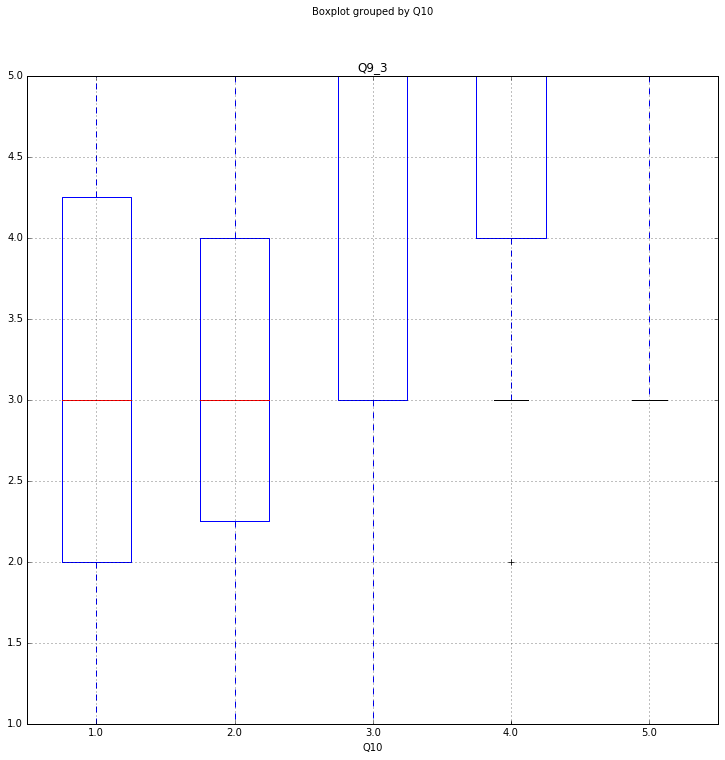

In [96]:
df1.boxplot('Q9_3', by='Q10', figsize=(12, 12))

group1,group2,meandiff,lower,upper,reject
1.0,2.0,-0.1071,-1.3644,1.1501,False
1.0,3.0,0.45,-0.5773,1.4773,False
1.0,4.0,0.7289,-0.2686,1.7264,False
1.0,5.0,0.7024,-0.3437,1.7485,False
2.0,3.0,0.5571,-0.4092,1.5235,False
2.0,4.0,0.836,-0.0985,1.7706,False
2.0,5.0,0.8095,-0.1767,1.7958,False
3.0,4.0,0.2789,-0.3111,0.8689,False
3.0,5.0,0.2524,-0.4165,0.9213,False
4.0,5.0,-0.0265,-0.6486,0.5956,False


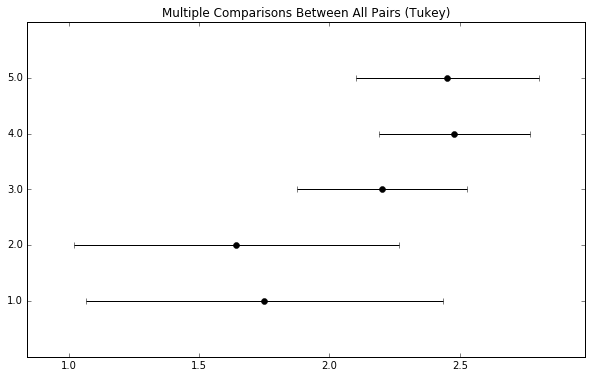

In [151]:
# post hoc test pairwise tuckey hsd

dfana_1 = df1.loc[df1['Q10'].astype(float) == 1][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12','Q10']]
dfana_2 = df1.loc[df1['Q10'].astype(float)==2][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12','Q10']]
dfana_3 = df1.loc[df1['Q10'].astype(float)==3][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12','Q10']]
dfana_4 = df1.loc[df1['Q10'].astype(float)==4][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12','Q10']]
dfana_5 = df1.loc[df1['Q10'].astype(float)==5][['Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q9_9','Q9_10','Q9_11','Q9_12','Q10']]

df1_1 = np.concatenate([dfana_1['Q9_1'],dfana_2['Q9_1'],dfana_3['Q9_1'], dfana_4['Q9_1'], dfana_5['Q9_1']], axis=0)
df1_11 = np.concatenate([dfana_1['Q10'],dfana_2['Q10'],dfana_3['Q10'], dfana_4['Q10'], dfana_5['Q10']], axis=0)

df2_1 = np.concatenate([dfana_1['Q9_2'],dfana_2['Q9_2'],dfana_3['Q9_2'], dfana_4['Q9_2'], dfana_5['Q9_2']], axis=0)
df2_11 = np.concatenate([dfana_1['Q10'],dfana_2['Q10'],dfana_3['Q10'], dfana_4['Q10'], dfana_5['Q10']], axis=0)

df3_1 = np.concatenate([dfana_1['Q9_3'],dfana_2['Q9_3'],dfana_3['Q9_3'], dfana_4['Q9_3'], dfana_5['Q9_3']], axis=0)
df3_11 = np.concatenate([dfana_1['Q10'],dfana_2['Q10'],dfana_3['Q10'], dfana_4['Q10'], dfana_5['Q10']], axis=0)

df4_1 = np.concatenate([dfana_1['Q9_4'],dfana_2['Q9_4'],dfana_3['Q9_4'], dfana_4['Q9_4'], dfana_5['Q9_4']], axis=0)
df4_11 = np.concatenate([dfana_1['Q10'],dfana_2['Q10'],dfana_3['Q10'], dfana_4['Q10'], dfana_5['Q10']], axis=0)

df5_1 = np.concatenate([dfana_1['Q9_5'],dfana_2['Q9_5'],dfana_3['Q9_5'], dfana_4['Q9_5'], dfana_5['Q9_5']], axis=0)
df5_11 = np.concatenate([dfana_1['Q10'],dfana_2['Q10'],dfana_3['Q10'], dfana_4['Q10'], dfana_5['Q10']], axis=0)

# do the pairwise test on modified data
tukey = pairwise_tukeyhsd(endog=df1_1,     # Data
                          groups=df1_11,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous().savefig('tuckey', format='pdf', dpi=1000, bbox_inches='tight')

tukey.summary()  
           

TypeError: unsupported operand type(s) for /: 'Cell' and 'Cell'

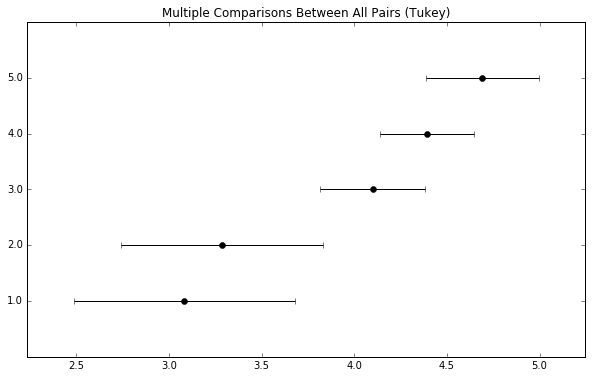

In [125]:
df2_1 = np.concatenate([dfana_1['Q9_3'],dfana_2['Q9_3'],dfana_3['Q9_3'], dfana_4['Q9_3'], dfana_5['Q9_3']], axis=0)
df2_11 = np.concatenate([dfana_1['Q10'],dfana_2['Q10'],dfana_3['Q10'], dfana_4['Q10'], dfana_5['Q10']], axis=0)

# do the pairwise test on modified data
tukey = pairwise_tukeyhsd(endog=df2_1,     # Data
                          groups=df2_11,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
res = tukey.summary() 



In [156]:
mod = MultiComparison(df3_1, df3_11)
print(stats.f_oneway(dfana_1['Q9_3'],dfana_2['Q9_3'],dfana_3['Q9_3'], dfana_4['Q9_3'], dfana_5['Q9_3']))
print(mod.tukeyhsd())
tukey = pairwise_tukeyhsd(endog=df3_1,     # Data
                          groups=df3_11,   # Groups
                          alpha=0.05)
res2 = tukey.summary()


print(mod.allpairtest(stats.ttest_ind, method="Holm")[0])
print(mod.allpairtest(stats.ttest_ind, method="b")[0])

F_onewayResult(statistic=9.7515188464656184, pvalue=3.5554161127292824e-07)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 1.0    2.0    0.2024  -0.8938 1.2985 False 
 1.0    3.0    1.0167   0.121  1.9124  True 
 1.0    4.0    1.311    0.4413 2.1807  True 
 1.0    5.0    1.6071   0.6951 2.5192  True 
 2.0    3.0    0.8143  -0.0282 1.6568 False 
 2.0    4.0    1.1087   0.2938 1.9235  True 
 2.0    5.0    1.4048   0.5449 2.2647  True 
 3.0    4.0    0.2944  -0.2201 0.8088 False 
 3.0    5.0    0.5905   0.0073 1.1737  True 
 4.0    5.0    0.2961  -0.2463 0.8385 False 
--------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=Holm
alphacSidak=0.01, alphacBonf=0.005
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 1.0    2.0   -0.3725 0.7128   0.7128  False 
 1.0    3.0   -2.6507 0.0103   0.0513  False 
 1.0    4.0

In [165]:
rs= res2.data[1][2] / res2.data[1][3]
pvalues = psturng(np.abs(rs), 5, 199)
rs


-0.22644886999328709

In [134]:
# attempt a mutliple t test
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((race1,race2))
   
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(dfana_1[dfana_1.columns[race1]], 
                          dfana_1[dfana_1.columns[race2]]))    

(0, 1)
Ttest_indResult(statistic=0.0, pvalue=1.0)
(0, 2)
Ttest_indResult(statistic=-2.1415693353802587, pvalue=0.043555545674384473)
(0, 3)
Ttest_indResult(statistic=0.0, pvalue=1.0)
(0, 4)
Ttest_indResult(statistic=-0.69156407480812454, pvalue=0.49644508288064826)
(1, 2)
Ttest_indResult(statistic=-2.1415693353802587, pvalue=0.043555545674384473)
(1, 3)
Ttest_indResult(statistic=0.0, pvalue=1.0)
(1, 4)
Ttest_indResult(statistic=-0.69156407480812454, pvalue=0.49644508288064826)
(2, 3)
Ttest_indResult(statistic=2.387552063997683, pvalue=0.025981587032002561)
(2, 4)
Ttest_indResult(statistic=1.5430611028355554, pvalue=0.1370790735050024)
(3, 4)
Ttest_indResult(statistic=-0.77742884201424134, pvalue=0.44518587965084189)


In [209]:
# do single tests
# 2 groups of people with education levels
# Care about mobile data
df1_edl = df1.loc[df1['Q4'].astype(float) <= 4]
df1_edh = df1.loc[df1['Q4'].astype(float) > 4]

# the t test
print(stats.ttest_ind(df1_edl['Q8'], 
                          df1_edh['Q8'])) 

# Mann U whitney Test
mannwhitneyu(df1_edl['Q8'], df1_edh['Q8'])

Ttest_indResult(statistic=-2.0730810432664537, pvalue=0.039535698389159518)


MannwhitneyuResult(statistic=3615.0, pvalue=0.014074227375938345)

In [192]:
# do single tests
# 2 groups of people with education levels
df1_ed1 = df1.loc[df1['Q7'].astype(float) == 1]
df1_ed2 = df1.loc[df1['Q7'].astype(float) == 2]
df1_ed3 = df1.loc[df1['Q7'].astype(float) == 3]
df1_ed4 = df1.loc[df1['Q7'].astype(float) == 4]
df1_ed5 = df1.loc[df1['Q7'].astype(float) == 5]
df1_ed6 = df1.loc[df1['Q7'].astype(float) == 6]

In [204]:
# Dunns test
import numpy as np
from scipy import stats
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
import warnings


def kw_dunn(groups, to_compare=None, alpha=0.05, method='bonf'):
    """
    Kruskal-Wallis 1-way ANOVA with Dunn's multiple comparison test
    Arguments:
    ---------------
    groups: sequence
        arrays corresponding to k mutually independent samples from
        continuous populations
    to_compare: sequence
        tuples specifying the indices of pairs of groups to compare, e.g.
        [(0, 1), (0, 2)] would compare group 0 with 1 & 2. by default, all
        possible pairwise comparisons between groups are performed.
    alpha: float
        family-wise error rate used for correcting for multiple comparisons
        (see statsmodels.stats.multitest.multipletests for details)
    method: string
        method used to adjust p-values to account for multiple corrections (see
        statsmodels.stats.multitest.multipletests for options)
    Returns:
    ---------------
    H: float
        Kruskal-Wallis H-statistic
    p_omnibus: float
        p-value corresponding to the global null hypothesis that the medians of
        the groups are all equal
    Z_pairs: float array
        Z-scores computed for the absolute difference in mean ranks for each
        pairwise comparison
    p_corrected: float array
        corrected p-values for each pairwise comparison, corresponding to the
        null hypothesis that the pair of groups has equal medians. note that
        these are only meaningful if the global null hypothesis is rejected.
    reject: bool array
        True for pairs where the null hypothesis can be rejected for the given
        alpha
    Reference:
    ---------------
    Gibbons, J. D., & Chakraborti, S. (2011). Nonparametric Statistical
    Inference (5th ed., pp. 353-357). Boca Raton, FL: Chapman & Hall.
    """

    # omnibus test (K-W ANOVA)
    # -------------------------------------------------------------------------

    groups = [np.array(gg) for gg in groups]

    k = len(groups)

    n = np.array([len(gg) for gg in groups])
    if np.any(n < 5):
        warnings.warn("Sample sizes < 5 are not recommended (K-W test assumes "
                      "a chi square distribution)")

    allgroups = np.concatenate(groups)
    N = len(allgroups)
    ranked = stats.rankdata(allgroups)

    # correction factor for ties
    T = stats.tiecorrect(ranked)
    if T == 0:
        raise ValueError('All numbers are identical in kruskal')

    # sum of ranks for each group
    j = np.insert(np.cumsum(n), 0, 0)
    R = np.empty(k, dtype=np.float)
    for ii in range(k):
        R[ii] = ranked[j[ii]:j[ii + 1]].sum()

    # the Kruskal-Wallis H-statistic
    H = (12. / (N * (N + 1.))) * ((R ** 2.) / n).sum() - 3 * (N + 1)

    # apply correction factor for ties
    H /= T

    df_omnibus = k - 1
    p_omnibus = stats.chisqprob(H, df_omnibus)

    # multiple comparisons
    # -------------------------------------------------------------------------

    # by default we compare every possible pair of groups
    if to_compare is None:
        to_compare = tuple(combinations(range(k), 2))

    ncomp = len(to_compare)

    Z_pairs = np.empty(ncomp, dtype=np.float)
    p_uncorrected = np.empty(ncomp, dtype=np.float)
    Rmean = R / n

    for pp, (ii, jj) in enumerate(to_compare):

        # standardized score
        Zij = (np.abs(Rmean[ii] - Rmean[jj]) /
               np.sqrt((1. / 12.) * N * (N + 1) * (1. / n[ii] + 1. / n[jj])))
        Z_pairs[pp] = Zij

    # corresponding p-values obtained from upper quantiles of the standard
    # normal distribution
    p_uncorrected = stats.norm.sf(Z_pairs) * 2.

    # correction for multiple comparisons
    reject, p_corrected, alphac_sidak, alphac_bonf = multipletests(
        p_uncorrected, method=method
    )

    return H, p_omnibus, Z_pairs, p_corrected, reject, p_uncorrected

In [208]:
# number of tiem checking mobile phone
# for the care for the mobile sensor data
race_pairs = []

for race1 in range(5):
    for race2  in range(race1+1,5):
        race_pairs.append((race1,race2))
print(race_pairs)
H, p_omnibus, Z_pairs, p_corrected, reject, p_un=kw_dunn([df1_ed1['Q8'], df1_ed2['Q8'],df1_ed3['Q8'], df1_ed4['Q8'],df1_ed5['Q8']], to_compare=race_pairs, alpha=0.05, method='b')
print(p_corrected)
print(reject)
print(p_un)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[False False False False False False False False False False]
[ 0.4    0.872  0.199  0.781  0.326  0.512  0.368  0.165  0.878  0.197]


In [191]:
p_omnibus

0.49359976246386728

In [199]:
len(df1_ed6)

0

In [211]:
# 2 education groups >=4
# for mobile sensor data care
race_pairs = []

H, p_omnibus, Z_pairs, p_corrected, reject, p_un=kw_dunn([df1_edl['Q8'], df1_edh['Q8']], to_compare=[(0,1)], alpha=0.05, method='b')
print(p_corrected)
print(reject)
print(p_un)

[ 0.033]
[ True]
[ 0.033]


In [226]:
# do single tests
# 2 groups of people frequency of mobile phone checking
# Care about mobile data

df1_ed1 = df1.loc[df1['Q1'].astype(float) == 1]
df1_ed2 = df1.loc[df1['Q1'].astype(float) == 2]
print(len(df1_ed1))
print(len(df1_ed2))
# the t test
print(stats.ttest_ind(df1_ed1['Q8'], 
                          df1_ed2['Q8'])) 

# Mann U whitney Test
print(mannwhitneyu(df1_ed1['Q8'], df1_ed2['Q8']))
H, p_omnibus, Z_pairs, p_corrected, reject, p_un=kw_dunn([df1_ed1['Q10'], df1_ed2['Q10']], to_compare=[(0,1)], alpha=0.05, method='b')
print(p_corrected)
print(reject)
print(p_un)

68
121
Ttest_indResult(statistic=-0.96848848203394811, pvalue=0.33405140014139512)
MannwhitneyuResult(statistic=3707.5, pvalue=0.1227321550088632)
[ 0.629]
[False]
[ 0.629]
